## Exercise 5

# Setup to run the notebook

- Ensure that `python3` is available in the system.
- Create a virtual env - `python3 -m venv env`
- Activate the env - `source env/bin/activate`
- Download the requirements via pip - `pip install pandas numpy matplotlib`


In [3]:
# Load the data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

adult = pd.read_csv('adult_with_pii.csv')
print(adult.head())

               Name        DOB          SSN    Zip  Age         Workclass  \
0  Karrie Trusslove   9/7/1967  732-14-6110  64152   39         State-gov   
1  Brandise Tripony   6/7/1988  150-19-2766  61523   50  Self-emp-not-inc   
2     Brenn McNeely   8/6/1991  725-59-9860  95668   38           Private   
3       Dorry Poter   4/6/2009  659-57-4974  25503   53           Private   
4       Dick Honnan  9/16/1951  220-93-3811  75387   28           Private   

   fnlwgt  Education  Education-Num      Marital Status         Occupation  \
0   77516  Bachelors             13       Never-married       Adm-clerical   
1   83311  Bachelors             13  Married-civ-spouse    Exec-managerial   
2  215646    HS-grad              9            Divorced  Handlers-cleaners   
3  234721       11th              7  Married-civ-spouse  Handlers-cleaners   
4  338409  Bachelors             13  Married-civ-spouse     Prof-specialty   

    Relationship   Race     Sex  Capital Gain  Capital Loss  Hours p

## 1: Laplace mechanism and counting queries

In [4]:
def laplace_mech(v, sensitivity, epsilon):
    """
    Implements the Laplace mechanism for differential privacy.

    :param v: The true answer to a query.
    :param sensitivity: The sensitivity of the query.
    :param epsilon: The privacy parameter.
    :return: The differentially private answer to the query.
    """
    # Calculate the scale of the Laplace noise
    scale = sensitivity / epsilon

    # Generate the Laplace noise
    noise = np.random.laplace(0, scale)

    # Add the noise to the true answer and return
    return v + noise

In [8]:
def people_over_29_dp(adult, epsilon):
    # Count the number of people over 29 in the dataset
    true_count = (adult['Age'] > 29).sum()
    print(f"True count of people over 29: {true_count}")
    # The sensitivity of the crosstab query is 1
    # because we are counting the number of people and
    # it can only increase or decrease by 1.
    sensitivity = 1

    # Apply the Laplace mechanism
    dp_count = laplace_mech(true_count, sensitivity, epsilon)

    return dp_count

# ln(2) = 0.6931 ~= 0.7
print(f"Differentially private count of people over 29: {people_over_29_dp(adult, epsilon=0.7):.2f}")

True count of people over 29: 22850
Differentially private count of people over 29: 22849.69


Exaplin:
- What is the sensitivity of this query, and why?

Answer:
1. The sensitivity of the counting query in the `people_over_29_dp()` function is 1.
2. This is because the query counts the number of people over 29 in the `adult` dataset, and adding or removing one individual can change the count by at most 1.

## 2: Contingency tables

In [11]:
# Generate differentially private contingency tables fo Education and Sex columns
def dp_crosstab_education_sex(adult, epsilon):
    # Create the contingency table
    crosstab = pd.crosstab(adult['Education'], adult['Sex'])

    # The sensitivity of the crosstab query is 1
    # because we are counting the number of people and it can only increase or decrease by 1.
    sensitivity = 1

    # Apply the Laplace mechanism to the crosstab
    dp_crosstab = laplace_mech(crosstab, sensitivity, epsilon)

    return dp_crosstab

dp_crosstab_education_sex(adult, 1.0)

Sex,Female,Male
Education,,
10th,294.100749,637.100749
11th,431.100749,742.100749
12th,143.100749,288.100749
1st-4th,45.100749,121.100749
5th-6th,83.100749,248.100749
7th-8th,159.100749,485.100749
9th,143.100749,369.100749
Assoc-acdm,420.100749,645.100749
Assoc-voc,499.100749,881.100749


In [6]:
# Generate differentially private contingency tables fo Relationship and Race columns
def dp_crosstab_relationship_race(adult, epsilon):
    # Create the contingency table
    crosstab = pd.crosstab(adult['Relationship'], adult['Race'])

    # The sensitivity of the crosstab query is 1
    # because we are counting the number of people and it can only increase or decrease by 1.
    sensitivity = 1

    # Apply the Laplace mechanism to the crosstab
    dp_crosstab = laplace_mech(crosstab, sensitivity, epsilon)

    return dp_crosstab

dp_crosstab_relationship_race(adult, 0.3)

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Relationship,,,,,
Husband,93.318972,411.318972,672.318972,81.318972,11941.318972
Not-in-family,82.318972,215.318972,813.318972,74.318972,7126.318972
Other-relative,14.318972,83.318972,165.318972,29.318972,695.318972
Own-child,49.318972,174.318972,556.318972,38.318972,4256.318972
Unmarried,59.318972,92.318972,770.318972,38.318972,2492.318972
Wife,20.318972,70.318972,154.318972,17.318972,1312.318972


Explain:
- Does parallel composition apply for generation of the contingency table? Why or why not?
- Does the number of variables used in constructing the contingency table matter for privacy
cost? Does it matter for accuracy?


Answer: Parallel composition when different queries are run on disjoint subsets of the data.

1. Parallel composition does not directly apply here because the contingency table is created from the entire dataset, not from disjoint subsets. 
2. The number of variables (or the dimensions of the contingency table) does affect the overall privacy cost.
3. The number of variables used in constructing the contingency table does matter for accuracy because as the number of cells in the table increases, the amount of noise added to each cell remains constant (since sensitivity is still 1 for each count), but the relative impact of this noise on smaller counts can be more significant.

## 3: Differentially private selections from sets

In [ ]:
adult['Occupation'].value_counts()

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [15]:
options = [
    'Prof-specialty',
    'Craft-repair',
    'Exec-managerial',
    'Adm-clerical',
    'Sales',
    'Other-service',
    'Machine-op-inspct',
    'Prof-specialty',
    'Transport-moving',
    'Handlers-cleaners',
    'Farming-fishing',
    'Tech-support',
    'Protective-serv',
    'Priv-house-serv',
    'Armed-Forces'
]

def score(option):
    # Count the frequency of each occupation
    frequency = adult['Occupation'].value_counts()

    # Normalize these counts to a scale 1 to 10
    max_score = 10
    min_score = 1
    score_range = max_score - min_score
    normalized_scores = ((frequency - frequency.min()) / (frequency.max() - frequency.min())) * score_range + min_score

    # Convert to a dictionary for easy lookup
    scores_dict = normalized_scores.to_dict()

    return scores_dict.get(option, 0)

score('Other-service')

8.159041394335512

In [17]:
def most_common_occupation(R, score, sensitivity, epsilon):
    # Count occurrences of each occupation
    counts = adult['Occupation'].value_counts()

    # Apply the Laplace mechanism to each count
    noisy_counts = counts.apply(lambda x: laplace_mech(x, sensitivity, epsilon))

    # Find the occupation with the highest noisy count
    most_common_occupation = noisy_counts.idxmax()

    return most_common_occupation

most_common_occupation(options, score, 1, 0.05)

'Prof-specialty'

Explain:

- What is the sensitivity of your scoring function?
- What is the total privacy cost for most_common_occupation and why?

Answer:
1. In the worst case, adding or removing one individual could change the frequency of the least and the most common categories by 1 so sensitivity is greater than 0 and depends on the dataset's size and distribution.
2. Total privacy cost will be epsilon = 0.05
- We are interested in the maximum of a set of counts -> "Which occupation is the most common?"
- We can see it as single application of a differentially private mechanism to the dataset.


## 4: Differentially private sums

Descriptive Statistics for Capital Gain:
 count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64


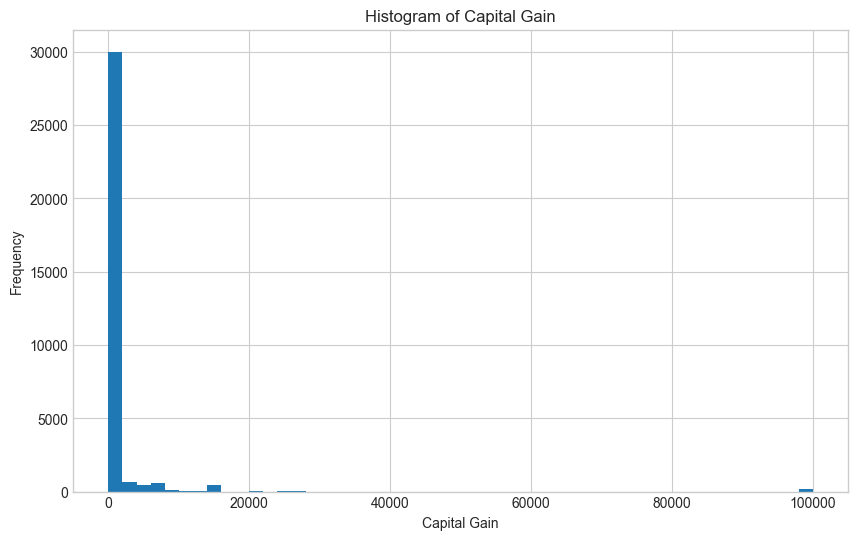

In [19]:
def analyze_capgain_distribution(adult=adult):
    stats = adult['Capital Gain'].describe()
    print("Descriptive Statistics for Capital Gain:\n", stats)

    # Histogram
    plt.figure(figsize=(10, 6))
    adult['Capital Gain'].hist(bins=50)
    plt.title('Histogram of Capital Gain')
    plt.xlabel('Capital Gain')
    plt.ylabel('Frequency')
    plt.show()

analyze_capgain_distribution()

In [23]:
def dp_sum_capgain(epsilon):
    # Clipping parameter set based on data distribution
    clipping_param = 10000

    # Clip the "Capital Gain" values
    clipped_values = adult['Capital Gain'].clip(upper=clipping_param)

    # Calculate the sum of clipped values
    sum_clipped = clipped_values.sum()

    # Sensitivity is equal to the clipping parameter
    sensitivity = clipping_param

    # Apply the Laplace mechanism
    dp_sum = laplace_mech(sum_clipped, sensitivity, epsilon)

    return dp_sum

print(f"Differentially private sum of Capital Gain: {dp_sum_capgain(epsilon=0.04):.2f}")

Differentially private sum of Capital Gain: 16790467.77


Explain:

- What clipping parameter did you use in your definition of dp_sum_capgain, and why?
- What is the sensitivity of the query you used in dp_sum_capgain, and how is it bounded?
- Argue that your definition of dp_sum_capgain has a total privacy cost of epsilon.

Answer:

1. Choosing clipping param
- The 25th, 50th (median), and 75th percentiles are all 0. This suggests that a significant portion of the dataset has a capital gain of zero.
- The standard deviation is quite high (7385.29), and the maximum value is 99999. This indicates a wide range in the data and the presence of extreme outliers.
- I chose 10000 which is likely to cover a significant portion of the meaningful non-zero data while excluding the extreme outliers.

2. The sensitivity of the query is the clipping parameter, as it represents the maximum change to the sum from any single individual's data.

3. The privacy cost of this operation is epsilon, as the Laplace mechanism is applied once to the sum.

## 5: Sensitivity

In [24]:
def differencing_attack():
    q1 = adult['Age'].sum()
    q2 = adult[adult['Name'] != 'Karrie Trusslove']['Age'].sum()

    return q1 - q2

print('Differencing attack result:', differencing_attack())

max_age = adult['Age'].max()
print('Max age:', max_age)

Differencing attack result: 39
Max age: 90


Explain:

- What is the *sensitivity* of the `differencing_attack` query defined above, and why?

Answer:

The query result directly outputs the age of a single individual, the sensitivity is equal to the maximum possible age in the dataset which is 90 in the provided dataset.

In [25]:
def dp_differencing_attack(epsilon):
    sensitivity = 90  # Based on the maximum age in the dataset
    # Split the epsilon between the two queries
    epsilon_per_query = epsilon / 2

    q1 = adult['Age'].sum()
    dp_q1 = laplace_mech(q1, sensitivity, epsilon_per_query)

    q2 = adult[adult['Name'] != 'Karrie Trusslove']['Age'].sum()
    dp_q2 = laplace_mech(q2, sensitivity, epsilon_per_query)

    return dp_q1 - dp_q2

print('DP Differencing attack result:', dp_differencing_attack(2.0))

DP Differencing attack result: 11.462242493405938
